Linear Model


\begin{equation}
z_n=0.5z_{n-1}+\xi_{n-1}
\end{equation}
with
$\xi_{n-1}\sim N(0,B)$ and $z_{0}\sim N(0,0.4)$

Observations
\begin{equation}
y_n=z_n+\eta_n
\end{equation}
$\eta_{n-1}\sim N(0,R)$

Kalman filter

Forecast formulas:
\begin{align}
\hat{m}_{n+1}&=Am_n\\
\hat{C}_{n+1}&=AC_nA^{\top}+B
\end{align}


Analysis formulas
\begin{align}
m_{n+1}&=\hat{m}_{n+1}-K_{n+1}(H\hat{m}_{n+1}-y_{n+1})\\
C_{n+1}&=\hat{C}_{n+1}-K_{n+1}H\hat{C}_{n+1}
\end{align}

with Kalman gain
\begin{equation}
K_{n+1}=\hat{C}_{n+1}H^{\top}(R+H\hat{C}_{n+1}H^{\top})^{-1}
\end{equation}

Exercise: Please implement the Kalman filter for the example above


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.io as sio
import math



In [92]:
n=100 # number of iterations

#initial 
B=0.15 # Model Noise
R=0.02 # Observation Noise
A = 0.5 # Model Matrix

# creation of numpy arrays for variables
z= np.zeros(n) 
m= np.zeros(n)
y= np.zeros(n)
C=  np.zeros(n)
K= np.zeros(n)

# initial values for covariance and mean of the posterior
C[0]=0.4
m[0]=0

# initial values of model (truth) and observation data 
z[0]=np.random.normal(loc=0.0, scale=0.4, size=None)
y[0]=z[0] + np.random.normal(loc=0.0, scale=R, size=None)


In [93]:
# iteration through kalman filter
for i in range(0,n-1,1):
    z[i+1]=A*z[i]+np.random.normal(loc=0.0, scale=B, size=None) # evolution of model
    y[i+1]=z[i+1] + np.random.normal(loc=0.0, scale=R, size=None) # evolution of observ.
    
    #forecast formulas
    m[i+1]=A*m[i]
    C[i+1]=A*A*C[i]+B

    K[i+1]=C[i+1]/(R+C[i+1]) # kalman gain
    
    # analysis formulas
    m[i+1]=m[i+1]-K[i+1]*(m[i+1]-y[i+1])
    C[i+1]=C[i+1]-K[i+1]*C[i+1]
    

In [94]:
print m[-1]
print C[-1]
print np.mean(z)
print np.cov(z)


-0.0698154658073
0.0177067730143
-0.0310717908316
0.0247841225021


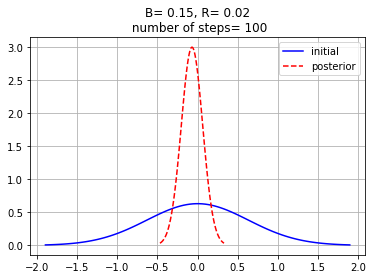

In [100]:
# plot initial cond.
mu = 0
variance = 0.4
sigma = math.sqrt(variance)
x = np.linspace(mu-3*sigma,mu+3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),"b", label="initial")

# plot posterior
mu_1 = m[-1]
variance_1 = C[-1]
sigma_1 = math.sqrt(variance_1)
x_1 = np.linspace(mu_1-3*sigma_1,mu_1+3*sigma_1, 100)
plt.plot(x_1,mlab.normpdf(x_1, mu_1, sigma_1),"r--", label="posterior")

plt.title("B= "+ str(B)+ ", R= "+ str(R) + "\n"+" number of steps= " + str(n))
plt.legend()
plt.grid()
plt.show()



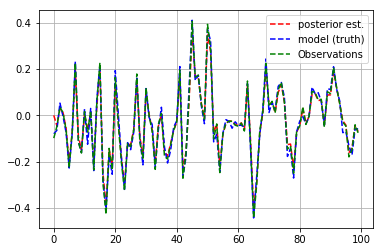

In [101]:
plt.plot(range(0,n), m, "r--", label= "posterior est.")
plt.plot(range(0,n), z, "b--", label= "model (truth)")
plt.plot(range(0,n), y, "g--", label="Observations")
plt.grid()
plt.legend()
plt.show()

Lorenz equations


\begin{align}
\dot{x}&=\sigma(y-x)\\
\dot{y}&=x(\rho-z)-y\\
\dot{z}&=xy-\beta z
\end{align}

Ensemble Kalman Filter
\begin{equation}
z^i_{n+1}=\hat{z}^i_{n+1}-K_{n+1}(H\hat{z}^i_{n+1}-\tilde{y}^i_{n+1})
\end{equation}

\begin{align}
m_{n}&\approx\frac{1}{M}\sum^M_{i=1}z^i_{n}\\
C_{n}&\approx\frac{1}{M}\sum^M_{i=1}(z^i_{n}-m_{n})(z^i_{n}-m_{n})^{\top}
\end{align}

Exercise: Please implement the Ensemble Kalman filter for the Lorenz equation



In [ ]:
mat_contents = sio.loadmat('octave_a.mat')

Particle filter


Exercise: Please implement the Particle filter with resampling for the Lorenz equation


